# Logistic Regression

Logistic regression is a supervised machine learning algorithm widely used for binary classification tasks, such as identifying whether an email is spam or not and diagnosing diseases by assessing the presence or absence of specific conditions based on patient test results.

## Importing and loading data

In [29]:
# Importing libraries
import pandas as pd 
import numpy as np

# For plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns

# Importing the train_test_split function
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn import metrics
from sklearn.metrics import f1_score

import warnings
warnings.filterwarnings('ignore')

In [30]:
# Load the data
cars_data = pd.read_csv('datasets/preprocessed_UsedCarsPrice.csv')

# Check the data
cars_data.head()

,Price,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol
0,13500,0.193355,0.170732,1,0,1.0,3,0.268293,1,0
1,13750,0.300149,0.170732,1,0,1.0,3,0.268293,1,0
2,13950,0.171647,0.170732,1,0,1.0,3,0.268293,1,0
3,14950,0.197528,0.170732,0,0,1.0,3,0.268293,1,0
4,13750,0.158433,0.170732,0,0,1.0,3,0.276423,1,0


In [31]:
# Describe the data
cars_data['Price'].describe().round(3)

count     1436.000
mean     10730.825
std       3626.965
min       4350.000
25%       8450.000
50%       9900.000
75%      11950.000
max      32500.000
Name: Price, dtype: float64

In [32]:
# Binning of price
bin_edges = [cars_data['Price'].min(), cars_data['Price'].quantile(0.75), cars_data['Price'].max()]
print(bin_edges)

[4350, 11950.0, 32500]


In [33]:
cars_data['Price_bin'] = pd.cut(cars_data['Price'], bins = bin_edges, labels=['Low', 'High'], include_lowest=True)

# Check the data
cars_data.head()

,Price,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol,Price_bin
0,13500,0.193355,0.170732,1,0,1.0,3,0.268293,1,0,High
1,13750,0.300149,0.170732,1,0,1.0,3,0.268293,1,0,High
2,13950,0.171647,0.170732,1,0,1.0,3,0.268293,1,0,High
3,14950,0.197528,0.170732,0,0,1.0,3,0.268293,1,0,High
4,13750,0.158433,0.170732,0,0,1.0,3,0.276423,1,0,High


In [34]:
# Check the frequency of the data
cars_data['Price_bin'].value_counts()

Price_bin
Low     1120
High     316
Name: count, dtype: int64

In [35]:
cars_data = cars_data.drop('Price', axis = 1)

cars_data['Price_bin'] = cars_data['Price_bin'].replace({'Low':0,'High':1})
cars_data = cars_data.rename(columns={'Price_bin':'Price'})

cars_data.head()

,KM,HP,MetColor,Automatic,CC,Doors,Weight,FuelType_Diesel,FuelType_Petrol,Price
0,0.193355,0.170732,1,0,1.0,3,0.268293,1,0,1
1,0.300149,0.170732,1,0,1.0,3,0.268293,1,0,1
2,0.171647,0.170732,1,0,1.0,3,0.268293,1,0,1
3,0.197528,0.170732,0,0,1.0,3,0.268293,1,0,1
4,0.158433,0.170732,0,0,1.0,3,0.276423,1,0,1


## Model building

### Splitting data

In [36]:
X = cars_data.drop('Price', axis=1)
Y = cars_data['Price']

In [37]:
# Splitting the data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state=0)

print(x_train.shape, x_test.shape)

(1148, 9) (288, 9)


### Fit the model

In [38]:
# Fit the Logistic Regression model
regressor = LogisticRegression()                                                 
regressor = regressor.fit(x_train, y_train)  

In [39]:
# Print the coefficients
print(regressor.coef_)

[[-8.57186798  1.13956797  0.75580607 -0.39230736  1.16264645  0.20816971
   5.89128186  0.28038783 -0.0655155 ]]


In [40]:
# Print the intercept
print(regressor.intercept_)

[-2.1114964]


In [41]:
y_pred = regressor.predict(x_test)
print(y_pred[:10])

[0 0 0 0 0 0 0 0 0 0]


In [42]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

print('Confusion Matrix:', cm, sep = '\n') 

Confusion Matrix:
[[215   6]
 [ 39  28]]


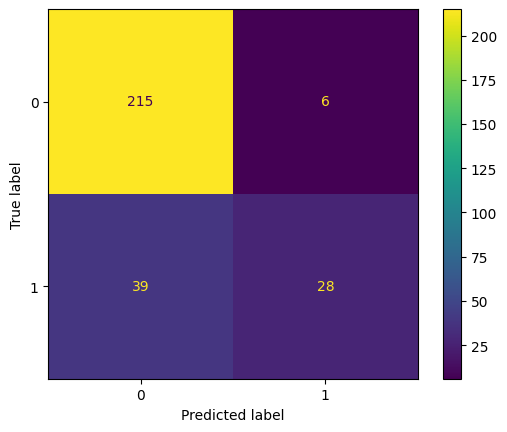

In [45]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Plot Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = regressor.classes_)

disp.plot()
plt.show()

In [46]:
training_score = regressor.score(x_train,y_train)  
print('Training Accuracy of the model:', round(training_score, 4))

testing_score = regressor.score(x_test, y_test)  
print('Testing Accuracy of the model:',round(testing_score, 4))

Training Accuracy of the model: 0.8815
Testing Accuracy of the model: 0.8438


As the testing accuracy is slightly lesser than the training accuracy, we can say that there is a slight overfitting in the model. However, as the difference is very less, we can ignore. If the testing accuracy is significantly lesser than that of training data, then we may need to go for improving the model.

### Plot the coefficients

Text(0.5, 1.0, 'Coefficient plot')

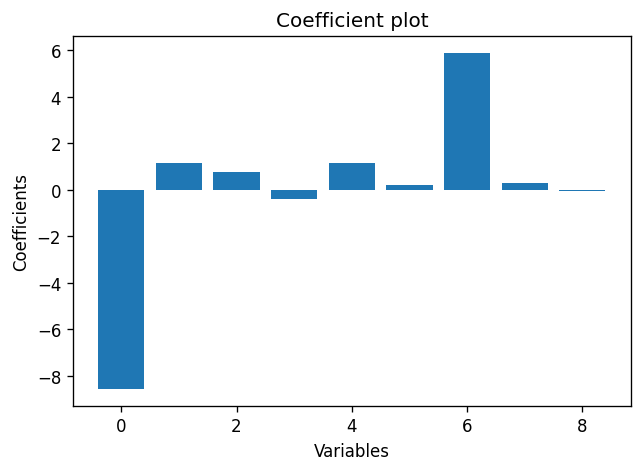

In [47]:
plt.figure(figsize=(6, 4), dpi=120, facecolor='w', edgecolor='b')
x = range(len(x_train.columns))
c = regressor.coef_.reshape(-1)

plt.bar(x, c)
plt.xlabel('Variables')
plt.ylabel('Coefficients')
plt.title('Coefficient plot')

### predict_proba() function

In [48]:
# Predicting over the Train
train_predict = regressor.predict_proba(x_train)
print(train_predict)

[[0.99342126 0.00657874]
 [0.65017938 0.34982062]
 [0.93593987 0.06406013]
 ...
 [0.64098685 0.35901315]
 [0.53406846 0.46593154]
 [0.95699117 0.04300883]]


In [49]:
train_preds = train_predict[:,1]
print(train_preds)

[0.00657874 0.34982062 0.06406013 ... 0.35901315 0.46593154 0.04300883]


In [52]:
for i in range(0, len(train_preds)):
  if(train_preds[i ] > 0.55):
    train_preds[i] = 1
  else:
    train_preds[i] = 0

# Calculating f1-score
k = f1_score(train_preds, y_train)
print('Training f1_score:', k.round(3))

Training f1_score: 0.587
